# Pre-processing Excersises

**Note**: this week there are no tasks, nothing will be graded. You are free to ask questions regarding these excersises though! What we will do is try to apply some of the code shown in the lectures to kind of get things rolling. As I probably mention in the lecture, it's not important for you to understand all the code shown in detail. This will probably make more sense at the end of your Data Processing lectures. For the time being, try to kind of understand what each function is doing, and more importantly, make sure you understand what each component in the pre-processing pipeline does on a higher level. **Knowing what you are looking at is more important than understanding the code.**

## Retrieving HTML

We will be using [this](http://www.imdb.com/title/tt0088763/synopsis?ref_=tt_ql_stry_3) page. In the sheet examples, I could conveniently extract all text because they were neatly put around `<p>...</p>` tags. Sadly, this is not the case for the page we are looking at today. Beautifulsoup (the library that makes HTML searchable), can search for more complex patterns though. What you will see a lot is for example `<div class="something">...</div>`. If you want all `div`s, that as class have `something`, the syntax for that is as follows: `soup.find_all('div', {'class': 'something'})`. 

> Q: How do I get Beautifulsoup?

> A: If you're using your own Anaconda install, it should already be in there. On JupyterHub it is NOT installed. Please check with someone who has the library installed if you still want to make this excersise and don't want to install Anaconda.


Now try to get the synopsis text for the page using the code below:

In [ ]:
import urllib3
from bs4 import BeautifulSoup as bs

def url_to_data(url):
    """Extracts html for a given url."""
    http = urllib3.PoolManager()
    html = http.request('GET', url).data.decode('utf-8')
    return html

url = '...'  # add
soup = bs(url_to_data(url), "lxml")
results = soup.find_all('div', {})  # add
text = [x.text for x in results][0]
text

In [1]:
# you can mess with `text` here

Feel free to apply any of the things we are discussing below to this `text` variable. For now however, we are going to work with another data format, namely JSON. 

## Working with JSON

The Twitter API allows you to search for keywords, or just monitor a live stream of incoming tweets (optionally filtered by some keyword or geolocation constraints). Using this API is out of scope for this class, so I stored the JSON results it gives in a `pickle` file (storage format for Python objects). If you are still interested in reading how to register for the API and some of its functionality, I wrote a [blog post](http://cmry.github.io/notes/twitter-python) on it. The syntax is pretty easy; it boils down to:

``` python
import tweepy

consumer_key = 'XXXXXXXXXXXXXXXXX' # own key you get after registering
consumer_secret = 'XXXXXXXXXXXXXXXXX' # own key

authentication_token = tweepy.AppAuthHandler(consumer_key, consumer_secret)
api = tweepy.API(authentication_token)

api.find('some_keyword')
```

> Q: What is an API?

> A: Some websites provide access to their data in some simple format. This usually implies that you send out a simple query to them, and they respond with a standard format that contains the results for your query. In Twitter's example, this is a JSON with the tweet, and meta-data.

Twitter wants you to validate your identity and limit your personal use of their service, which is why they require you to provide these two codes (`consumer_key` and `consumer_secret`). The `AppAuthHandler` knocks on Twitter's door, gives them these two keys and, if they are valid, they give you back a certificate (token) you can use to connect to the API. After this, you can use the `api` object to carry out certain operations (`find`, `friends`, `user_timeline` are some examples.


Because of privacy reasons, I will not print the actual tweet here. You are welcome to expect the format for yourself though. Just uncomment `tweets[2]` and run.

In [7]:
import pickle

tweets = pickle.load(open('data/tweets.pickle', 'rb'))

# tweets[2]

As you can see, there is a lot of information you can recover from the JSON file of a single tweet. Besides geo information, isolated hashtags, text, retweets etc., the API also provides you with user information per tweet. This includes their name, profile description, profile colours, and activity (favourites, statuses). We can select them by simply nesting calls to the object: 

In [6]:
print(tweets[2]['user']['statuses_count'])
print(tweets[2]['text'])

712
tell me why McDonald's gave me a sweet tea w no ice?¿ #wtffff🙄


## Tokenizing Tweets

We will focus on the text only for this part; which I will store in a simple list. Try to fill in this regex that will tokenize the text:

In [18]:
import re

tokenized_tweets = []
for tweet in tweets:
                                        # only edit this part <--------
    tokenized_tweets.append([x for x in re.findall('[a-z] ', tweet['text']) if x and x != ' '])
    
tokenized_tweets

[['r ', 'a ', 'g ', 'd ', 't ', 'g ', 's ', 'f ', 'g ', 't ', 'n '],
 ['t ', 'u ', 'n ', 'm ', 'n ', 'n ', 'm ', 's '],
 ['l ', 'e ', 'y ', 's ', 'e ', 'e ', 'a ', 't ', 'a ', 'w ', 'o '],
 ['s ', 'a ', 'g ', 'h ', 'd ', 'o ', 's ', 'o ', 'y ', 'l '],
 ['y '],
 ['t ',
  'e ',
  'y ',
  'e ',
  'k ',
  'f ',
  'y ',
  's ',
  'e ',
  'r ',
  's ',
  'f ',
  'r '],
 ['s ', 'l ', 'u ', 'n ', 'y ', 'o ', 't ', 't ', 'f ']]

Now if you want to try, you can compare your own regex tokenizer to that of SpaCy. I will already fill out the results for those who don't manage to get SpaCy working.

> Q: How do I install SpaCy?

> A: Again, our JupyterHub doesn't have this available yet. Installation instructions for SpaCy in anaconda are [here](https://spacy.io/docs/#getting-started).

In [24]:
import spacy
nlp = spacy.load('en')
    
spacy_tokens = [[token.text for token in nlp(tweet['text'])] for tweet in tweets]
spacy_tokens

[['After',
  'a',
  'long',
  'weekend',
  'RD',
  ',',
  '11',
  'straight',
  'working',
  'days',
  'awaits',
  '!',
  '#',
  'wtffff',
  'bring',
  'it',
  'on',
  '👯'],
 ['Waitttt',
  'u',
  'can',
  'zoom',
  'in',
  'on',
  'instagram',
  'pics',
  'now',
  '?',
  '!',
  '?',
  '!',
  '#',
  'wtffff'],
 ['tell',
  'me',
  'why',
  'McDonald',
  "'s",
  'gave',
  'me',
  'a',
  'sweet',
  'tea',
  'w',
  'no',
  'ice?¿',
  '#',
  'wtffff🙄'],
 ['there',
  "'s",
  'a',
  'breaking',
  'Amish',
  'kid',
  'who',
  'goes',
  'to',
  'my',
  'school',
  '#',
  'wtffff'],
 ['Candy', 'perrreooooo', '?', '?', '#', 'WTFFFF'],
 ['I',
  'got',
  'one',
  'question',
  '...',
  'Why',
  'the',
  'fu@k',
  '30',
  '%',
  'of',
  'my',
  'followers',
  'are',
  'either',
  'scammers',
  'of',
  'pornstars',
  '?',
  '?',
  '🤔😂',
  '@twitter',
  '#',
  'wtffff'],
 ['WOW',
  'is',
  'all',
  'you',
  'can',
  'say',
  'to',
  'that',
  'hit',
  '#',
  'wtffff',
  '#',
  'LSUvsWISC']]

What do you think about your regex, does it cover many edge cases that you might consider are seperate tokens? How does SpaCy do? Do you think it is suitable for twitter?

# Application Examples

## Language Identification

One of the things we can now do with these tokens is a task called language identification. Basically, you want to know what language a certain tweet was written in (handy if you are working on a specific language, and in general to filter languages). For this example, we will use dictionaries from English and German, and simply count how many words are in each of them.

In [45]:
# read the wordlists, make them into a set (list with unique words)
english = set(open('data/english-dict.txt').read().split('\n'))
german = set(open('data/german-dict.txt').read().split('\n'))

# flatten the lists in list for the spacy_tokens
token_list = [token.lower() for tweet in spacy_tokens for token in tweet]
tokens = set(token_list)

# task: try to print different variables to see what they contain

print("Length English dict", len(english))
print("Length German dict", len(german))
print("")

print("Tokens in English dict", len(tokens & english))
print("Tokens in German dict", len(tokens & german))
print("")

print("Out of Vocabulary words:", tokens - english)

Length English dict 25323
Length German dict 1022

Tokens in English dict 45
Tokens in German dict 1

Out of Vocabulary words: {"'s", '...', '👯', 'amish', 'w', 'rd', 'fu@k', 'waitttt', '#', '!', '11', 'wtffff🙄', 'a', 'ice?¿', '30', '%', 'scammers', 'wtffff', '🤔😂', 'mcdonald', '@twitter', 'perrreooooo', 'pics', 'i', ',', 'lsuvswisc', '?', 'pornstars', 'instagram', 'u'}


The sets that we are using (rather than lists) allow for special comparions. You can for example say: give me the words that occur in `tokens` as well as in `english` (`tokens & english`), or give me the words that occur in `tokens` but do NOT occur in `english` (`tokens - english`). The latter would be considered as Out Of Vocabulary (OOV) words. More info [here](https://docs.python.org/2/library/sets.html#set-objects).

## Frequencies and Plotting

As we saw in the lecutre, once you have your tokens prepared, Python has an easy way of converting these into a list of word frequencies, namely the Counter class. To easily select the most popular words, you can append `most_common(somenumber)`.

In [48]:
from collections import Counter

word_frequencies = Counter(token_list)
word_frequencies.most_common(10)

[('#', 8),
 ('wtffff', 6),
 ('?', 6),
 ('!', 3),
 ('a', 3),
 ('my', 2),
 ('me', 2),
 ("'s", 2),
 ('on', 2),
 ('can', 2)]

Python allows for splitting these into for example `word` and `frequency`, by using the following syntax:

In [51]:
words, frequencies = zip(*word_frequencies.items())

Zip ties together two variables, so:

In [54]:
example = list(zip("a", "b"))
example

[('a', 'b')]

The `zip(*...)` sytnax (using the `*` after `(`) unties them again:

In [57]:
a, b  = zip(*example)
a

('a',)

We can plot these using `matplotlib`. We can go several ways, first let's try to see how many words have a certain frequency (frequency on x, word frequency on y, i.e. over 60 words have frequency 1). What it shows here is us plotting a list of frequencies as a histogram (`plt.hist`).

> Q: How do I install matplotlib?

> A: Again, not on JupyterHub (*sigh*), but should be included in Anaconda.

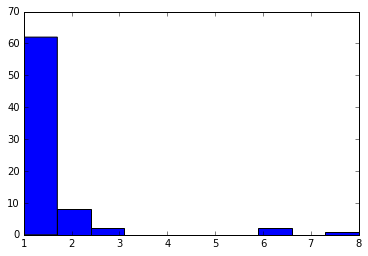

In [63]:
%matplotlib inline  
# above shows the plots in jupyter (fancy)


import matplotlib.pyplot as plt

plt.hist(frequencies)
plt.show()

Sadly, `matplotlib` cannot handle actual string words in a basic example, so we need to use the Counter class to sort them for us so we can enumerate the frequencies (i.e. the word with rank 1 (most common) has frequency x, etc). This we do by just passing a large number to most_common, or by using the length (bit neater):

In [67]:
ranked = word_frequencies.most_common(len(word_frequencies))
ranks, frequencies = zip(*[(rank, pairs[1]) for rank, pairs in enumerate(ranked)])

After we can use a line chart `plt.plot` and insert the `x` and `y` variables:

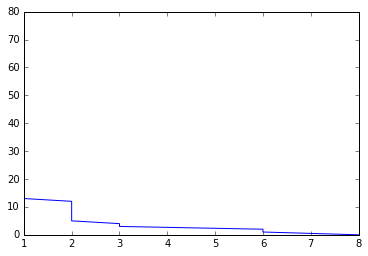

In [71]:
plt.plot(frequencies, ranks)